In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d

pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv('cars_cleaned.csv', encoding = "ISO-8859-1", low_memory=False, index_col=0)

In [3]:
# Show all columns
print(df.columns.tolist())

['Year', 'Model', 'Specs', 'MSRP', 'EPA_Class', 'Body_Stype', 'Drivetrain', 'Psg_Cp', 'Psg_Doors', 'Front_Wheel_Mat', 'Rear_Wheel_Mat', 'Basic_Miles', 'Basic_Year', 'Drivetrain_Miles', 'Drivetrain_Years', 'Road_Assist_Miles', 'Road_Assist_Years', 'Max_Alt_Cp', 'Maint_Miles', 'Maint_Year', 'Max_Alt_Watts', 'Other_Features', 'Weight', 'Trailer_cpt', 'Volume', 'Width', 'Height', 'Length', 'Size_avg', 'Airbag_Front_Driver', 'Airbag_Front_Psg', 'Airbag_Psg_Switch', 'Airbag_SBF', 'Airbag_SBR', 'Airbag_SHF', 'Airbag_SHR', 'Child_Door_Locks', 'Day_Lights', 'Trac_Control', 'Night_Vision', 'Rollover_Prt', 'Fog_Lamps', 'Parking_Aid', 'Tire_P_Monitor', 'Backup_Camera', 'Stability_Ctl', 'Num_safety', 'Fuel_Tank_Cpt', 'MPG_avg', 'MPG_City', 'MPG_Hwy', 'Susp_Front', 'Susp_Front2', 'Susp_Rear', 'Susp_Rear2', 'Trans_Speed', 'Battery_Amps', 'HP1', 'HP2', 'Engine_Type', 'Displacement', 'Corrosion_Miles', 'Corrosion_Years']


In [5]:
df.head()

,Year,Model,Specs,MSRP,EPA_Class,Body_Stype,Drivetrain,Psg_Cp,Psg_Doors,Front_Wheel_Mat,Rear_Wheel_Mat,Basic_Miles,Basic_Year,Drivetrain_Miles,Drivetrain_Years,Road_Assist_Miles,Road_Assist_Years,Max_Alt_Cp,Maint_Miles,Maint_Year,Max_Alt_Watts,Other_Features,Weight,Trailer_cpt,Volume,Width,Height,Length,Size_avg,Airbag_Front_Driver,Airbag_Front_Psg,Airbag_Psg_Switch,Airbag_SBF,Airbag_SBR,Airbag_SHF,Airbag_SHR,Child_Door_Locks,Day_Lights,Trac_Control,Night_Vision,Rollover_Prt,Fog_Lamps,Parking_Aid,Tire_P_Monitor,Backup_Camera,Stability_Ctl,Num_safety,Fuel_Tank_Cpt,MPG_avg,MPG_City,MPG_Hwy,Susp_Front,Susp_Front2,Susp_Rear,Susp_Rear2,Trans_Speed,Battery_Amps,HP1,HP2,Engine_Type,Displacement,Corrosion_Miles,Corrosion_Years
0,2019,Acura RDX,Acura RDX Specs: FWD w/Technology Pkg,40600,Small Sport Utility Vehicles 2WD,Sport Utility,Front Wheel Drive,5,4,Aluminum,Aluminum,50000.0,4.0,70000.0,6.0,50000.0,4.0,NaN,NaN,NaN,NaN,Vehicle Stability Assist Electronic Stability ...,NaN,NaN,NaN,74.8,65.7,NaN,46.833333,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes,12,17.1,24.0,22.0,28.0,Strut,Strut,Multi-Link,Multi-Link,10.0,NaN,280.0,272.0,Turbo Premium Unleaded I-4,2.0,300000.0,5.0
1,2019,Acura RDX,Acura RDX Specs: FWD w/Advance Pkg,45500,Small Sport Utility Vehicles 2WD,Sport Utility,Front Wheel Drive,5,4,Aluminum,Aluminum,50000.0,4.0,70000.0,6.0,50000.0,4.0,NaN,NaN,NaN,NaN,Vehicle Stability Assist Electronic Stability ...,NaN,NaN,NaN,74.8,65.7,NaN,46.833333,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,13,17.1,24.0,22.0,28.0,Strut,Strut,Multi-Link,Multi-Link,10.0,NaN,280.0,272.0,Turbo Premium Unleaded I-4,2.0,300000.0,5.0
2,2019,Acura RDX,Acura RDX Specs: FWD w/A-Spec Pkg,43600,Small Sport Utility Vehicles 2WD,Sport Utility,Front Wheel Drive,5,4,Aluminum,Aluminum,50000.0,4.0,70000.0,6.0,50000.0,4.0,NaN,NaN,NaN,NaN,Vehicle Stability Assist Electronic Stability ...,NaN,NaN,NaN,74.8,65.7,NaN,46.833333,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,13,17.1,24.0,22.0,27.0,Strut,Strut,Multi-Link,Multi-Link,10.0,NaN,280.0,272.0,Turbo Premium Unleaded I-4,2.0,300000.0,5.0
3,2019,Acura RDX,Acura RDX Specs: FWD,37400,Small Sport Utility Vehicles 2WD,Sport Utility,Front Wheel Drive,5,4,Aluminum,Aluminum,50000.0,4.0,70000.0,6.0,50000.0,4.0,NaN,NaN,NaN,NaN,Vehicle Stability Assist Electronic Stability ...,NaN,NaN,NaN,74.8,65.7,NaN,46.833333,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes,11,17.1,24.0,22.0,28.0,Strut,Strut,Multi-Link,Multi-Link,10.0,NaN,280.0,272.0,Turbo Premium Unleaded I-4,2.0,300000.0,5.0
4,2019,Acura RDX,Acura RDX Specs: AWD w/Technology Pkg,42600,Small Sport Utility Vehicles 4WD,Sport Utility,All Wheel Drive,5,4,Aluminum,Aluminum,50000.0,4.0,70000.0,6.0,50000.0,4.0,NaN,NaN,NaN,NaN,Vehicle Stability Assist Electronic Stability ...,NaN,NaN,NaN,74.8,65.7,NaN,46.833333,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes,12,17.1,23.0,21.0,27.0,Strut,Strut,Multi-Link,Multi-Link,10.0,NaN,280.0,272.0,Turbo Premium Unleaded I-4,2.0,300000.0,5.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32262 entries, 0 to 32261
Data columns (total 63 columns):
Year                   32262 non-null int64
Model                  32262 non-null object
Specs                  32262 non-null object
MSRP                   32262 non-null int64
EPA_Class              30286 non-null object
Body_Stype             30546 non-null object
Drivetrain             30546 non-null object
Psg_Cp                 32262 non-null int64
Psg_Doors              32262 non-null int64
Front_Wheel_Mat        30293 non-null object
Rear_Wheel_Mat         30293 non-null object
Basic_Miles            29879 non-null float64
Basic_Year             30145 non-null float64
Drivetrain_Miles       29076 non-null float64
Drivetrain_Years       29374 non-null float64
Road_Assist_Miles      19088 non-null float64
Road_Assist_Years      24632 non-null float64
Max_Alt_Cp             22714 non-null float64
Maint_Miles            5519 non-null float64
Maint_Year             5569 non-n

In [7]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, len(data)+1) / n
    return x, y
    

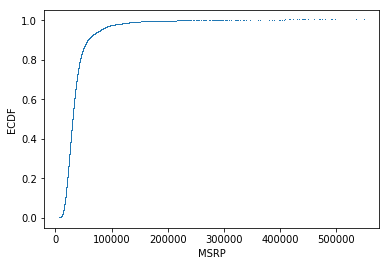

In [8]:
x, y = ecdf(df['MSRP'])
plt.plot(x, y, marker=',', linestyle='none')
plt.xlabel('MSRP')
plt.ylabel('ECDF')
plt.show()

179


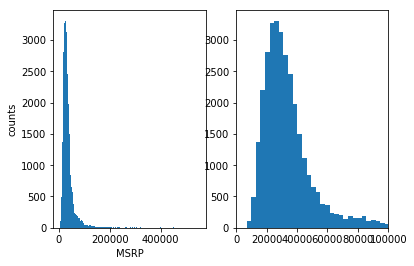

In [9]:
bin_data = np.sqrt(len(df['MSRP']))
bin_num = int(bin_data)
print(bin_num)
plt.clf()
fig, axs = plt.subplots(1, 2)
axs[0].hist(df['MSRP'], bins=bin_num)
axs[0].set_xlabel('MSRP')
axs[0].set_ylabel('counts')

axs[1].set_xlim(0, 100000)
axs[1].hist(df['MSRP'], bins=bin_num)

# how to rotate tick labels
# axs[1].tick_params(labelrotation=45)
plt.show()

In [12]:
df_toyota = df[df['Model'].str.contains('Toyota')]

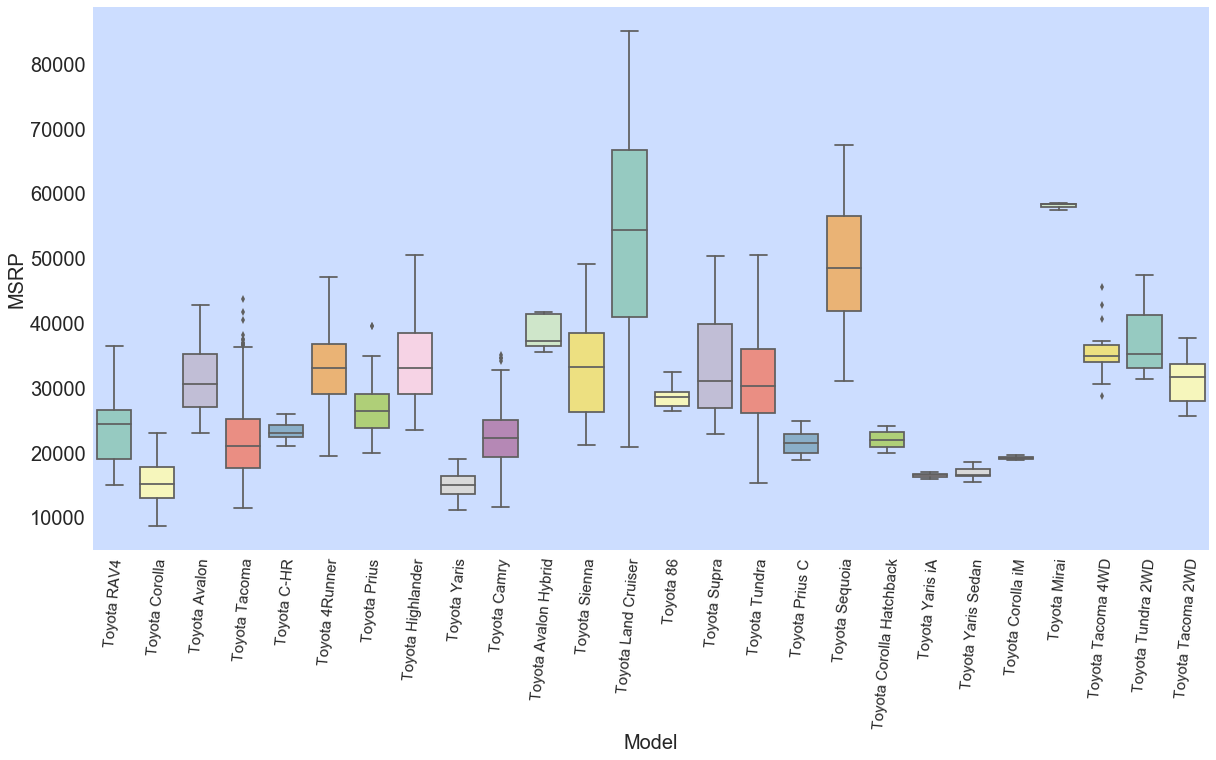

In [13]:
sns.set(rc={"axes.facecolor":"#ccddff",
            "axes.grid":False,
            'axes.labelsize':20,
            'figure.figsize':(20.0, 10.0),
            'xtick.labelsize':15,
            'ytick.labelsize':20})

plt.figure(figsize=(20,10))
sns.boxplot(x="Model", y="MSRP", data=df_toyota, palette="Set3") # notch=True
plt.xticks(rotation=85)

# plt.text(20, 0, "Box Plot", fontsize = 55, color="black", fontstyle='italic')
plt.show()

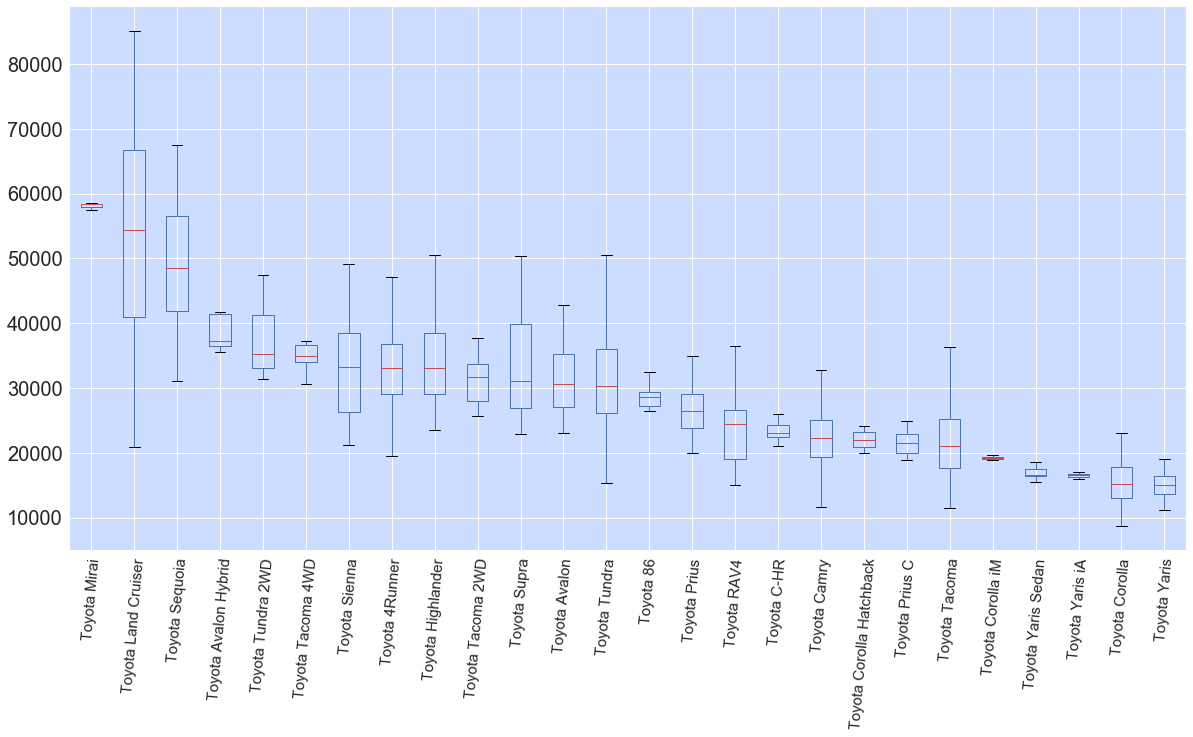

In [14]:
grouped = df_toyota.groupby(['Model'])

df2 = pd.DataFrame({col:vals['MSRP'] for col,vals in grouped})

meds = df2.median()
meds = meds.sort_values(ascending=False)
df2 = df2[meds.index]

df2.boxplot()
plt.xticks(rotation=85)

plt.show()

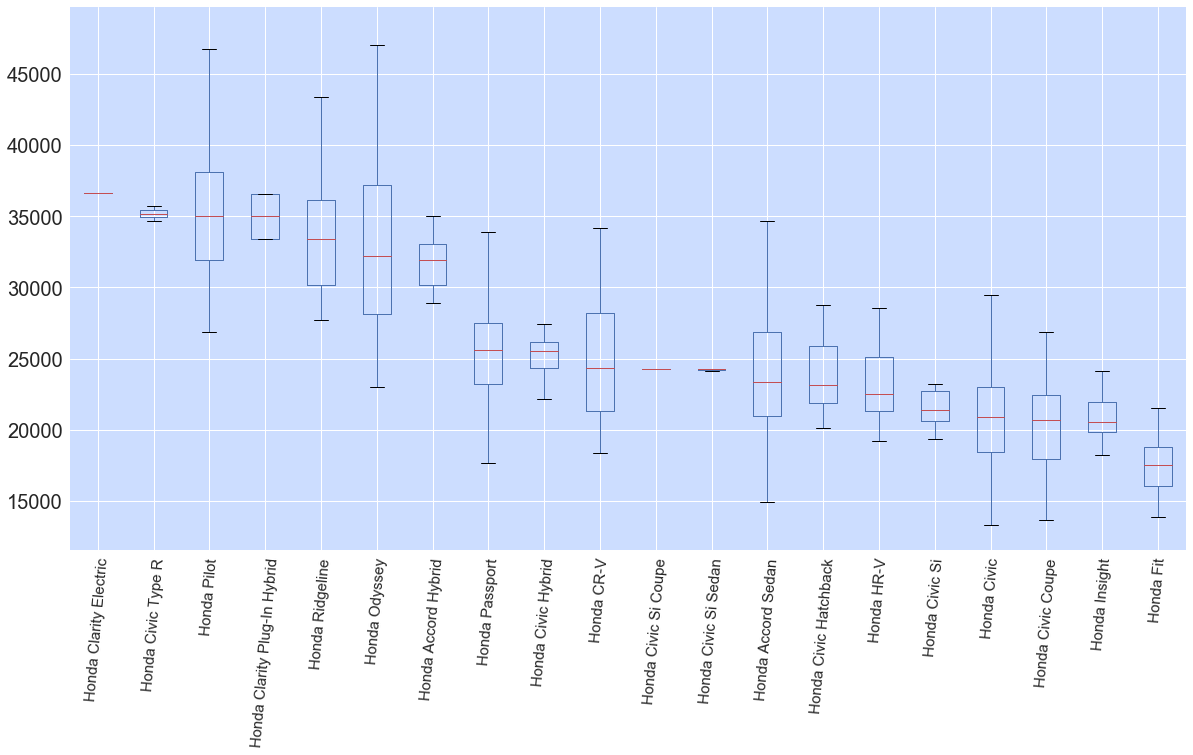

In [20]:
df_honda = df[df['Model'].str.contains('Honda')]
grouped = df_honda.groupby(['Model'])

df2 = pd.DataFrame({col:vals['MSRP'] for col,vals in grouped})

meds = df2.median()
meds = meds.sort_values(ascending=False)
df2 = df2[meds.index]

df2.boxplot()
plt.xticks(rotation=85)

plt.show()

In [21]:
plt.figure(figsize=(7,3))

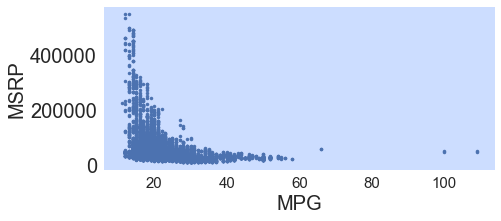

In [22]:
plt.plot(df['MPG_avg'], df['MSRP'], marker='.', linestyle='none')
plt.xlabel('MPG')
plt.ylabel('MSRP')
plt.show()

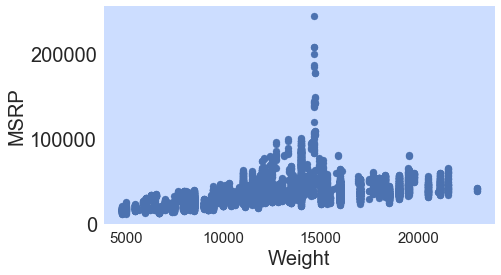

In [23]:
plt.figure(figsize=(7,4))
plt.scatter(df['Weight'], df['MSRP'])
plt.xlabel('Weight')
plt.ylabel('MSRP')
plt.show()

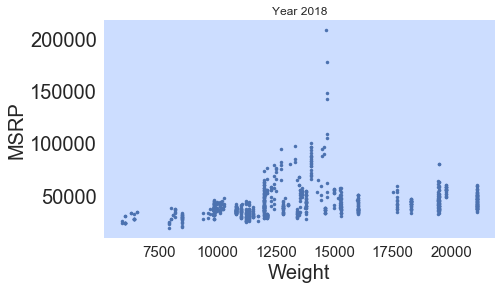

In [24]:
plt.figure(figsize=(7,4))
weight_2018 = df['Weight'].where(df['Year']==2018)
MSRP_2018 = df['MSRP'].where(df['Year']==2018)

plt.plot(weight_2018, MSRP_2018, '.')
plt.xlabel('Weight')
plt.ylabel('MSRP')
plt.title('Year 2018')
plt.show()

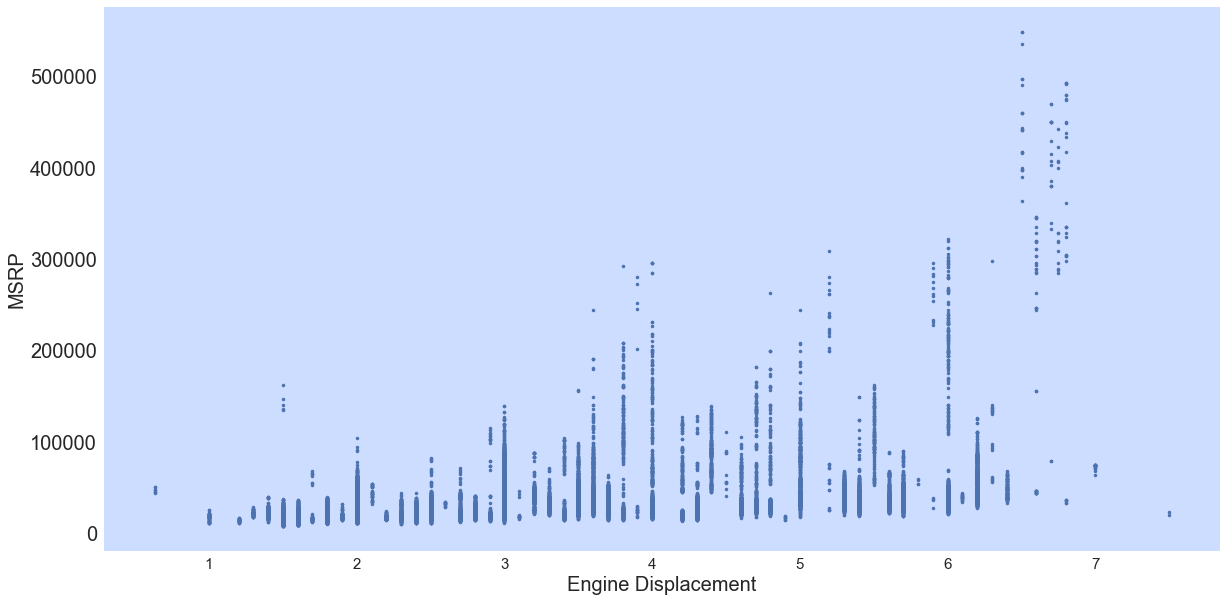

In [25]:
plt.plot(df['Displacement'], df['MSRP'], marker='.', linestyle='none')
plt.xlabel('Engine Displacement')
plt.ylabel('MSRP')
plt.show()

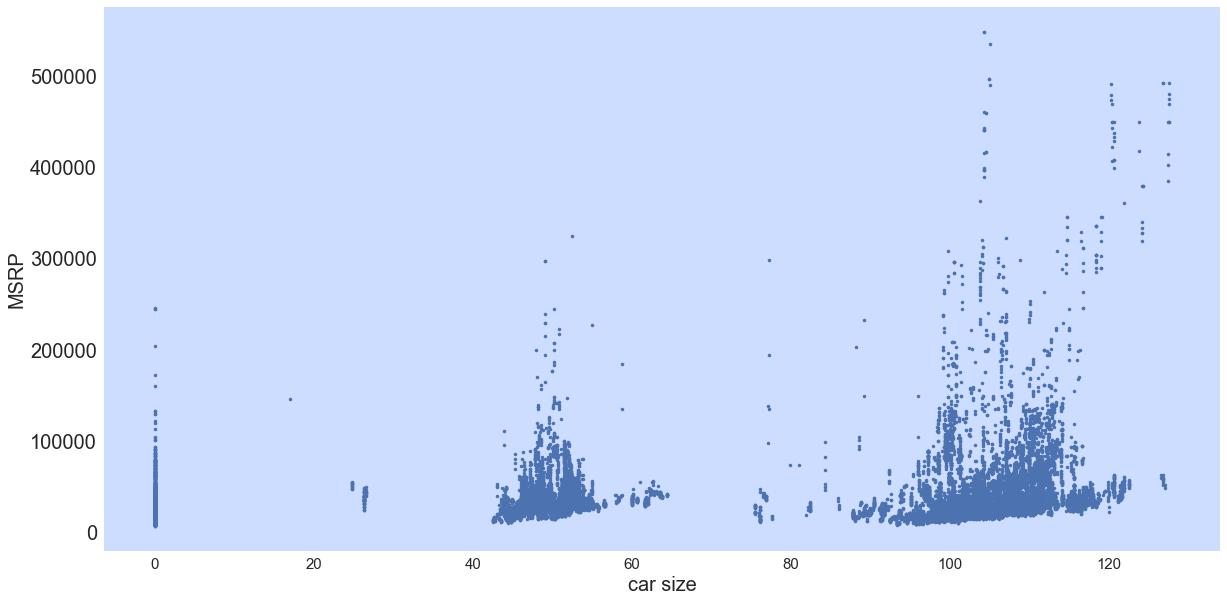

In [26]:
plt.plot(df['Size_avg'], df['MSRP'], marker='.', linestyle='none')
plt.xlabel('car size')
plt.ylabel('MSRP')
plt.show()

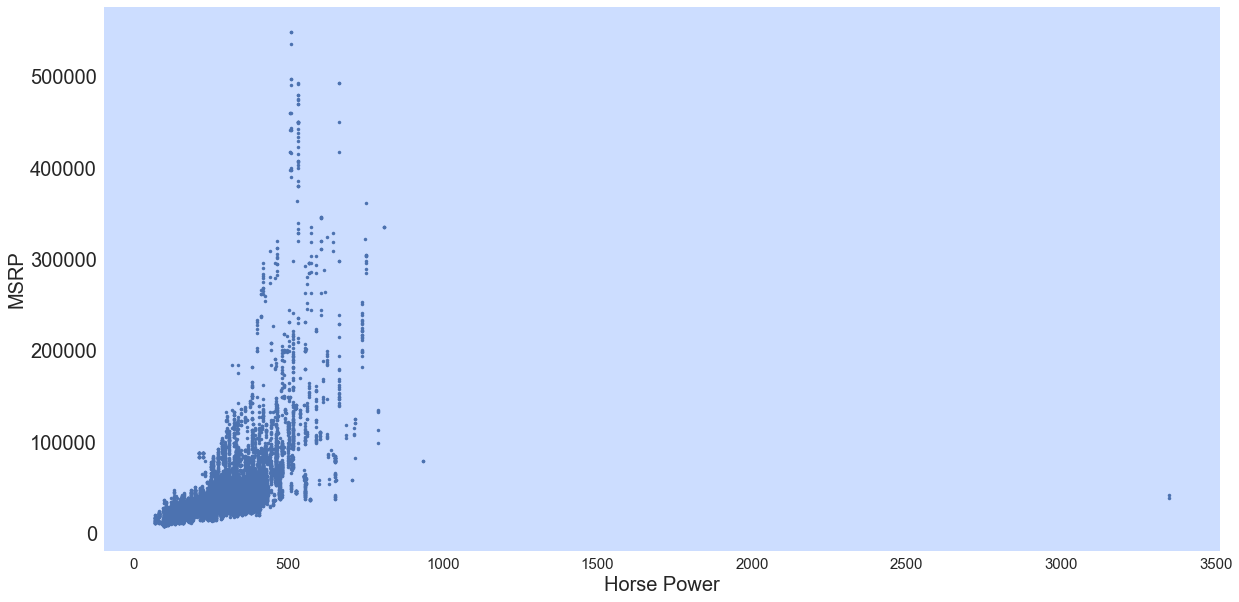

In [27]:
plt.plot(df['HP1'], df['MSRP'], marker='.', linestyle='none')
plt.xlabel('Horse Power')
plt.ylabel('MSRP')
plt.show()

In [30]:
a, b = np.polyfit(df['HP1'], df['MSRP'], deg=1, full=True)
x = np.array([68, 808])
plt.plot(x, a * x + b)
plt.plot(df['HP1'], df['MSRP'], marker='.', linestyle='none')
plt.xlabel('Horse Power')
plt.ylabel('MSRP')
plt.xlim(0, 1000)
plt.show()

ValueError: too many values to unpack (expected 2)

In [31]:
df[['HP1', 'HP2']].max()

HP1    3350.0
HP2     808.0
dtype: float64

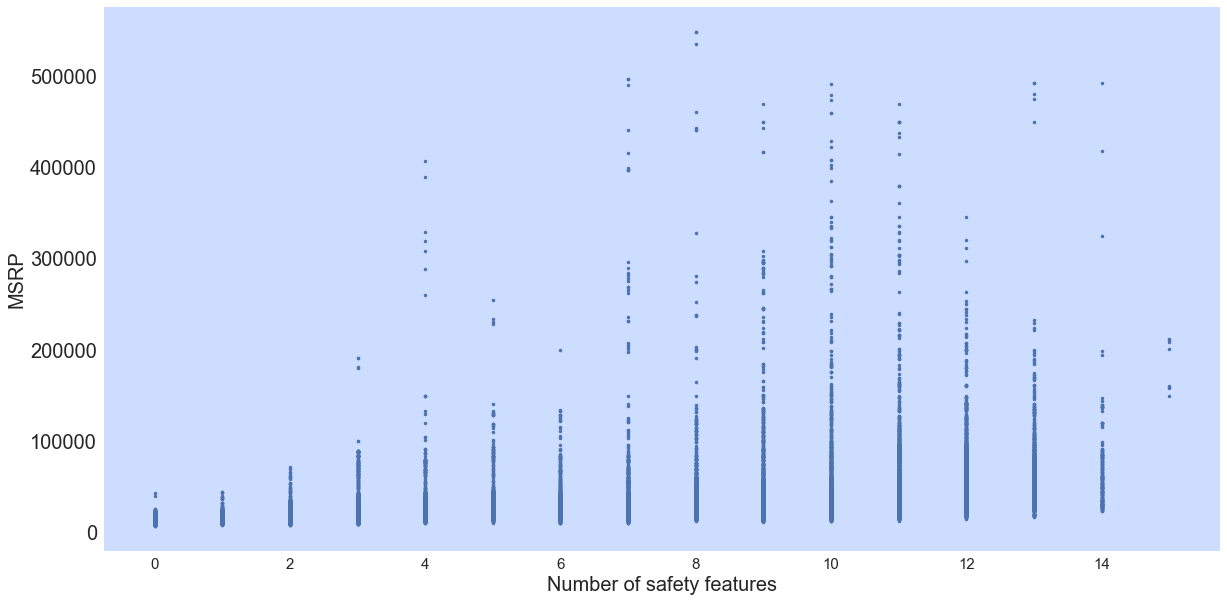

In [32]:
plt.plot(df['Num_safety'], df['MSRP'], marker='.', linestyle='none')
plt.xlabel('Number of safety features')
plt.ylabel('MSRP')
plt.show()

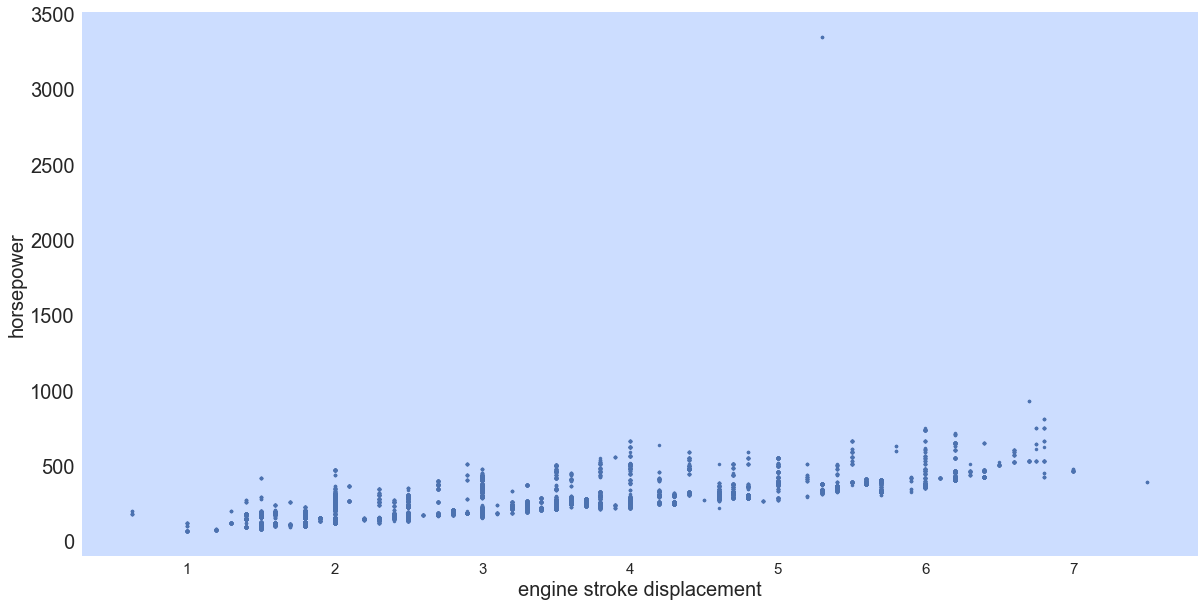

In [33]:
plt.plot(df['Displacement'], df['HP1'], marker='.', linestyle='none')
plt.xlabel('engine stroke displacement')
plt.ylabel('horsepower')
plt.show()

In [34]:
df = df.reset_index()

In [35]:
df['HP1'][df['HP1'] > 3000]

5719    3350.0
5720    3350.0
Name: HP1, dtype: float64

In [36]:
df.loc[5719:5721, 'HP1'] = 335.0

In [37]:
df.iloc[5718:5723, :]

,index,Year,Model,Specs,MSRP,EPA_Class,Body_Stype,Drivetrain,Psg_Cp,Psg_Doors,Front_Wheel_Mat,Rear_Wheel_Mat,Basic_Miles,Basic_Year,Drivetrain_Miles,Drivetrain_Years,Road_Assist_Miles,Road_Assist_Years,Max_Alt_Cp,Maint_Miles,Maint_Year,Max_Alt_Watts,Other_Features,Weight,Trailer_cpt,Volume,Width,Height,Length,Size_avg,Airbag_Front_Driver,Airbag_Front_Psg,Airbag_Psg_Switch,Airbag_SBF,Airbag_SBR,Airbag_SHF,Airbag_SHR,Child_Door_Locks,Day_Lights,Trac_Control,Night_Vision,Rollover_Prt,Fog_Lamps,Parking_Aid,Tire_P_Monitor,Backup_Camera,Stability_Ctl,Num_safety,Fuel_Tank_Cpt,MPG_avg,MPG_City,MPG_Hwy,Susp_Front,Susp_Front2,Susp_Rear,Susp_Rear2,Trans_Speed,Battery_Amps,HP1,HP2,Engine_Type,Displacement,Corrosion_Miles,Corrosion_Years
5718,5718,2009,Chevrolet Tahoe,Chevrolet Tahoe Specs: 2WD 4-Door 1500 LTZ,48550,No Data,Sport Utility,Rear Wheel Drive,7,4,Aluminum,Aluminum,36000.0,3.0,100000.0,5.0,100000.0,5.0,160.0,NaN,NaN,NaN,"StabiliTrak, stability control system with tra...",11000.0,NaN,NaN,79.0,76.9,NaN,51.966667,Yes,Yes,No,No,No,Yes,Yes,No,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,10,26.0,16.0,14.0,20.0,Coil springs,NaN,Coil springs,NaN,6.0,600.0,340.0,320.0,Gas V8,5.3,100000.0,6.0
5719,5719,2009,Chevrolet Tahoe,Chevrolet Tahoe Specs: 2WD 4-Door 1500 LT w/2LT,42040,No Data,Sport Utility,Rear Wheel Drive,8,4,Aluminum,Aluminum,36000.0,3.0,100000.0,5.0,100000.0,5.0,160.0,NaN,NaN,NaN,"StabiliTrak, stability control system with tra...",11000.0,NaN,NaN,79.0,76.9,NaN,51.966667,Yes,Yes,No,No,No,Yes,Yes,No,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,10,26.0,17.0,14.0,20.0,Coil springs,NaN,Coil springs,NaN,6.0,600.0,335.0,310.0,Gas/Ethanol V8,5.3,100000.0,6.0
5720,5720,2009,Chevrolet Tahoe,Chevrolet Tahoe Specs: 2WD 4-Door 1500 LT w/1LT,39515,No Data,Sport Utility,Rear Wheel Drive,8,4,Aluminum,Aluminum,36000.0,3.0,100000.0,5.0,100000.0,5.0,160.0,NaN,NaN,NaN,"StabiliTrak, stability control system with tra...",11000.0,NaN,NaN,79.0,76.9,NaN,51.966667,Yes,Yes,No,No,No,Yes,Yes,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,9,26.0,17.0,14.0,20.0,Coil springs,NaN,Coil springs,NaN,6.0,600.0,335.0,310.0,Gas/Ethanol V8,5.3,100000.0,6.0
5721,5721,2009,Chevrolet Tahoe,Chevrolet Tahoe Specs: 2WD 4-Door 1500 LS,36965,No Data,Sport Utility,Rear Wheel Drive,9,4,Aluminum,Aluminum,36000.0,3.0,100000.0,5.0,100000.0,5.0,160.0,NaN,NaN,NaN,"StabiliTrak, stability control system with tra...",10000.0,NaN,NaN,79.0,76.9,NaN,51.966667,Yes,Yes,No,No,No,Yes,Yes,No,Yes,Yes,No,No,No,No,Yes,No,Yes,8,26.0,16.0,14.0,20.0,Coil springs,NaN,Coil springs,NaN,4.0,600.0,335.0,295.0,Gas V8,4.8,100000.0,6.0
5722,5722,2008,Chevrolet Tahoe,Chevrolet Tahoe Specs: 2WD 4-Door,49590,No Data,Sport Utility,Rear Wheel Drive,8,4,Aluminum,Aluminum,36000.0,3.0,100000.0,5.0,100000.0,5.0,NaN,NaN,NaN,NaN,"StabiliTrak, stability control system with Pro...",12000.0,NaN,NaN,79.0,76.9,NaN,51.966667,Yes,Yes,No,No,No,Yes,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes,10,26.0,NaN,21.0,22.0,Coil springs,NaN,Coil springs,NaN,4.0,730.0,367.0,332.0,Gas/Electric V8,6.0,100000.0,6.0


C:\Users\dongt\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


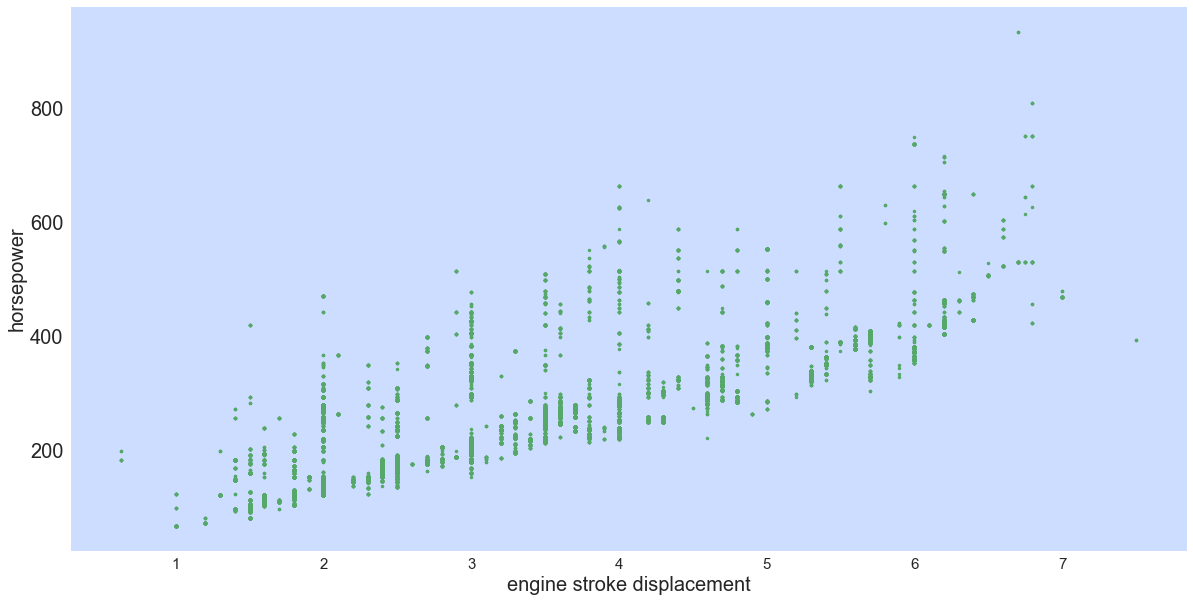

In [46]:
a, b = np.polyfit(df['Displacement'], df['HP1'], deg=1)
x = np.array([df['Displacement'].min(), df['Displacement'].max()])
plt.plot(x, a*x + b)              
              
plt.plot(df['Displacement'], df['HP1'], marker='.', linestyle='none')
plt.xlabel('engine stroke displacement')
plt.ylabel('horsepower')
plt.show()

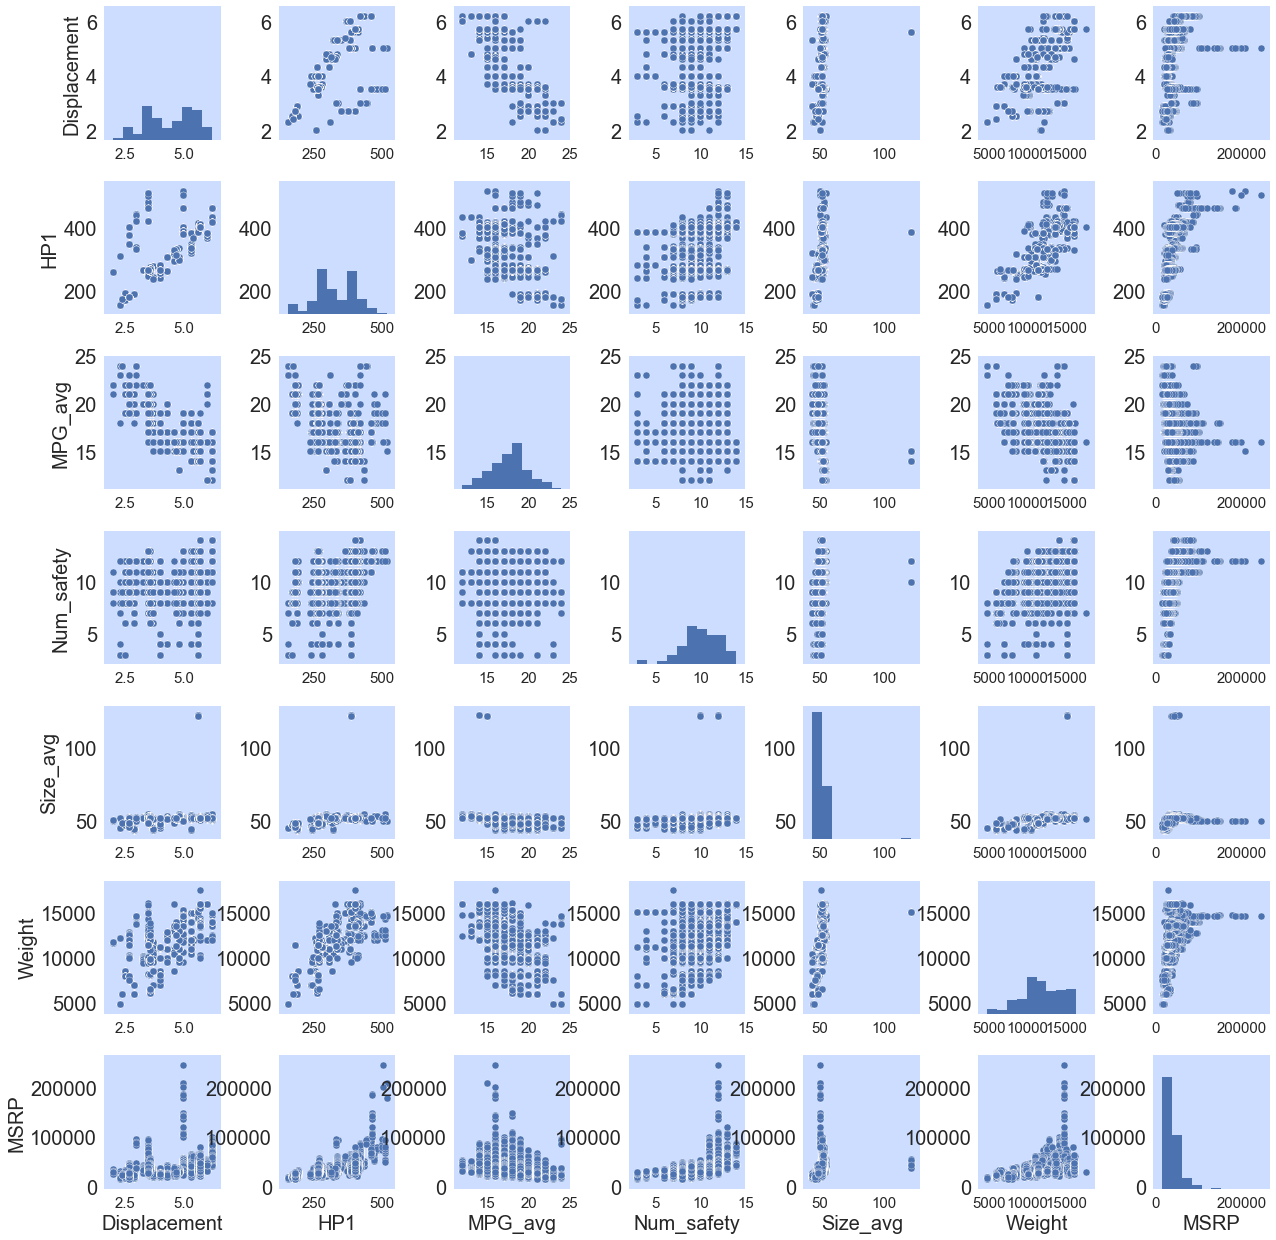

In [54]:
df2 = df[['Displacement', 'HP1', 'MPG_avg', 'Num_safety', 'Size_avg', 'Weight', 'MSRP']]
df2 = df2.dropna()
sns.pairplot(df2)
plt.show()

## 3-D Plots

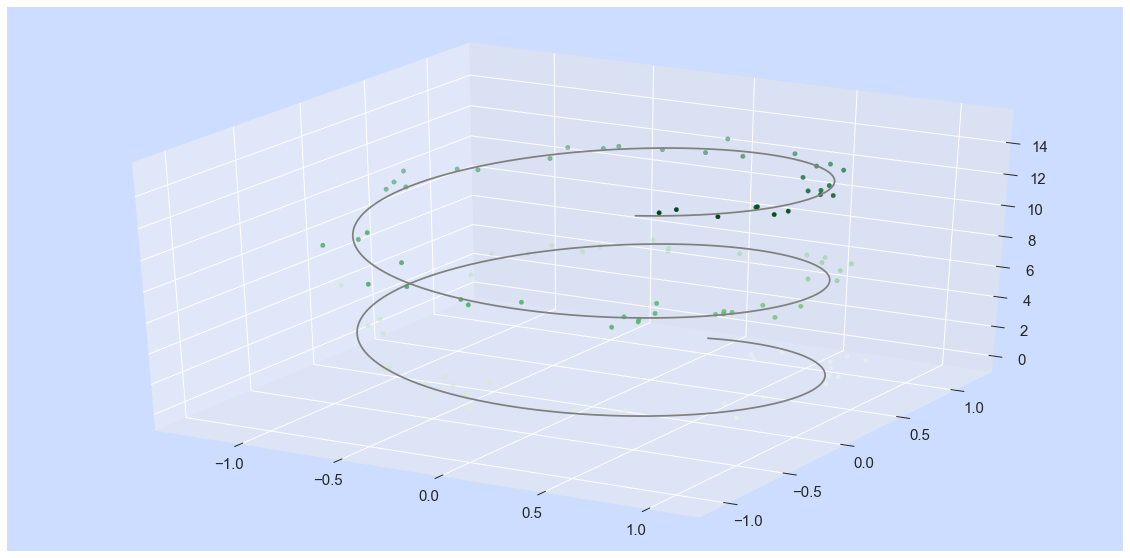

In [47]:

ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')
plt.show()

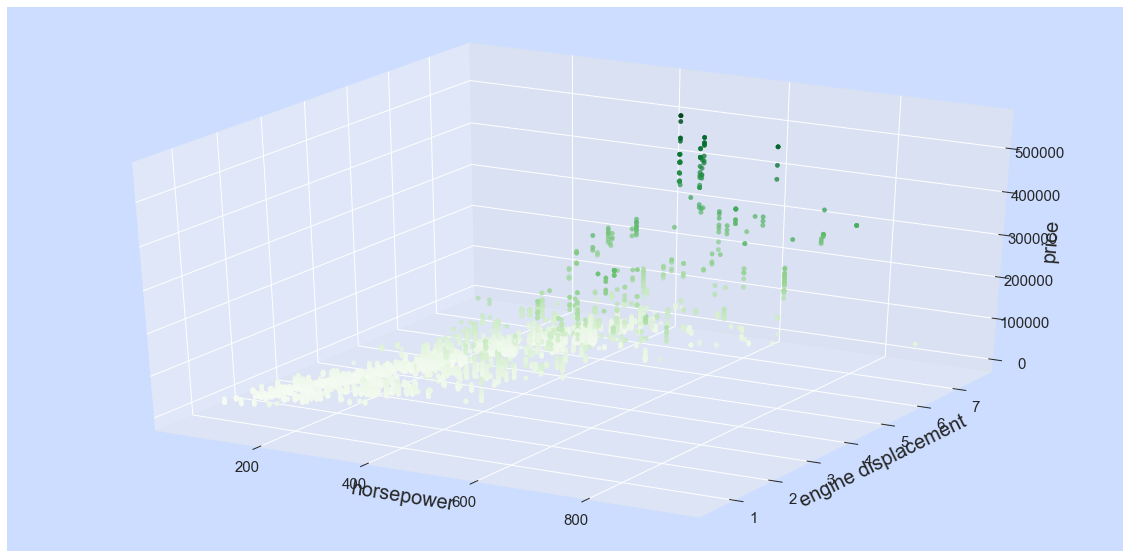

In [48]:
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
xdata = df['HP1']
ydata = df['Displacement']
zdata = df['MSRP']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')
ax.set_xlabel('horsepower')
ax.set_ylabel('engine displacement')
ax.set_zlabel('price')
plt.show()

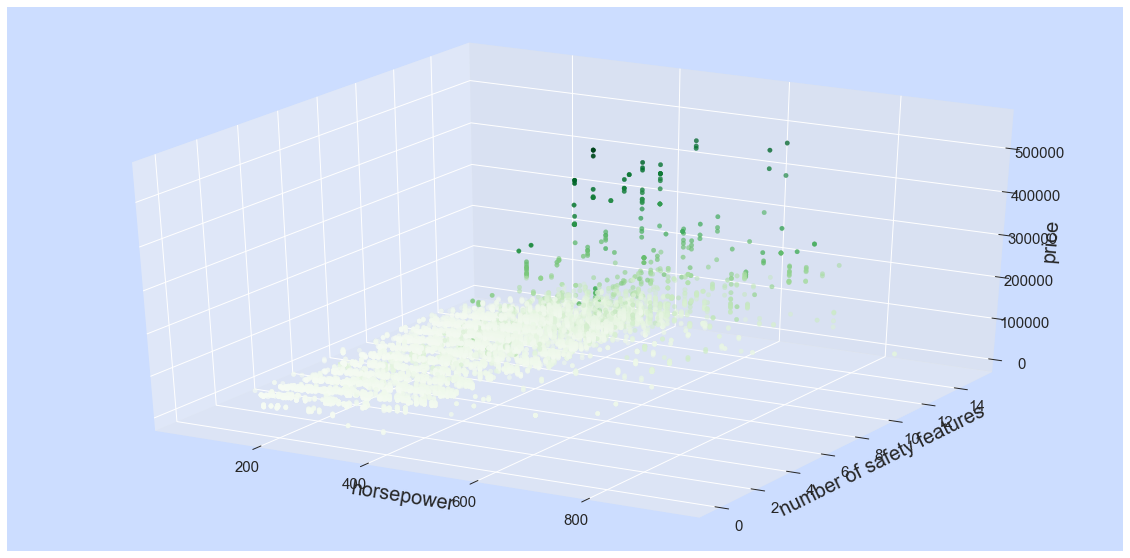

In [49]:
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
xdata = df['HP1']
ydata = df['Num_safety']
zdata = df['MSRP']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')
ax.set_xlabel('horsepower')
ax.set_ylabel('number of safety features')
ax.set_zlabel('price')
plt.show()

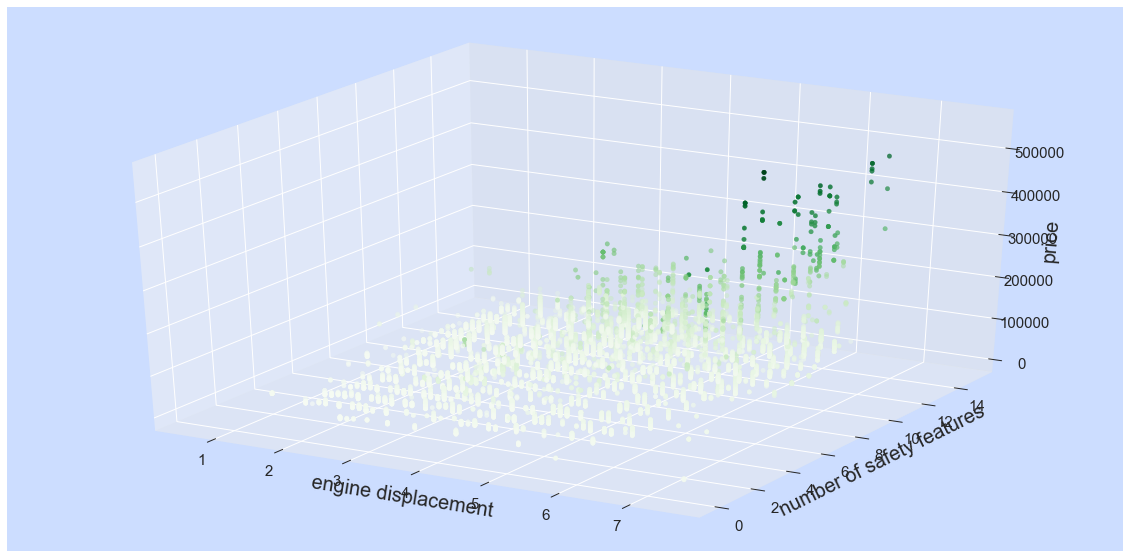

In [42]:
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
xdata = df['Displacement']
ydata = df['Num_safety']
zdata = df['MSRP']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')
ax.set_xlabel('engine displacement')
ax.set_ylabel('number of safety features')
ax.set_zlabel('price')
plt.show()

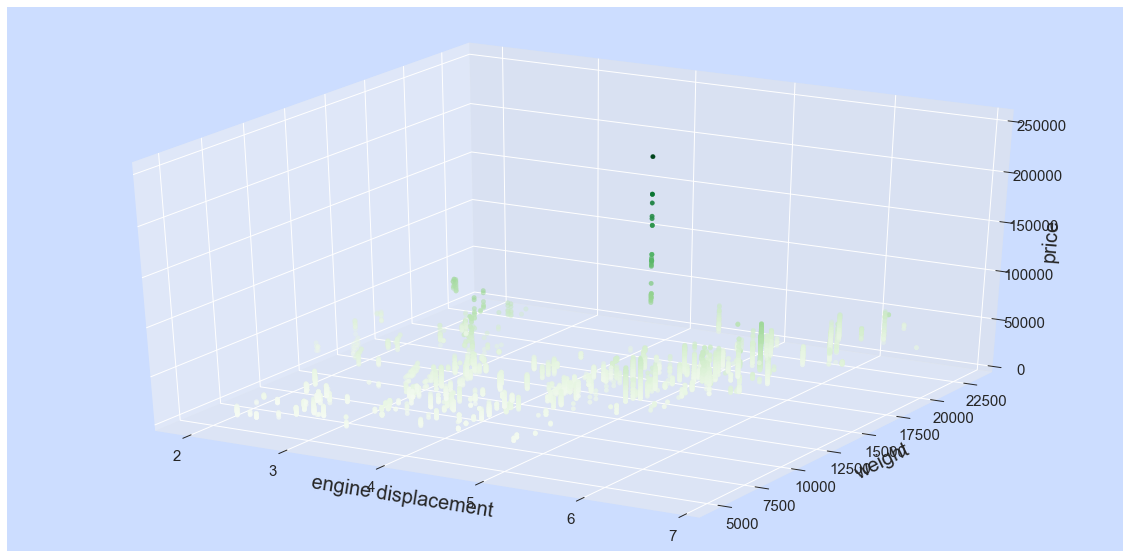

In [43]:
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
xdata = df['Displacement']
ydata = df['Weight']
zdata = df['MSRP']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')
ax.set_xlabel('engine displacement')
ax.set_ylabel('weight')
ax.set_zlabel('price')
plt.show()

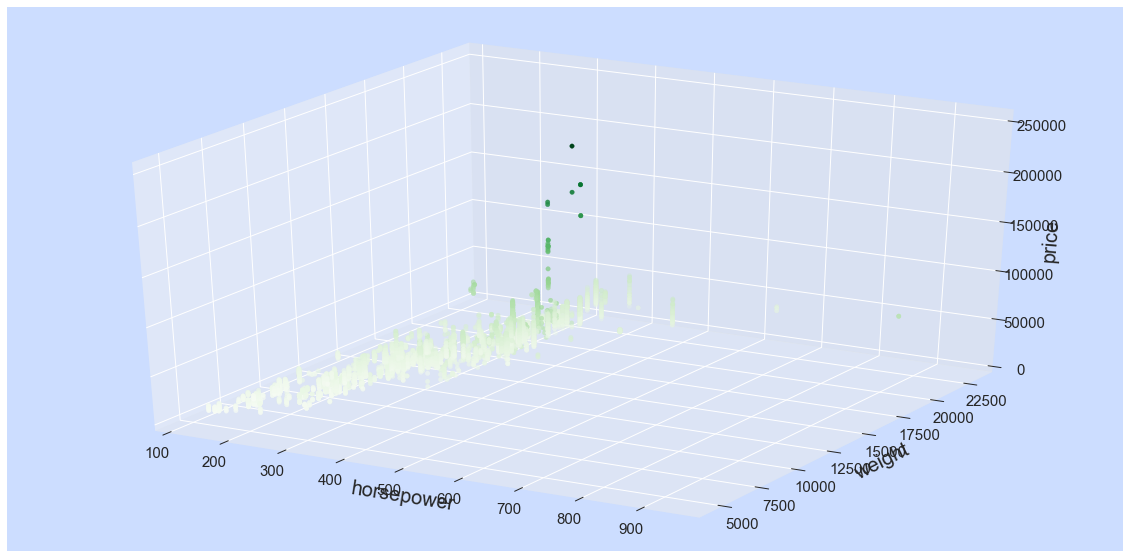

In [44]:
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
xdata = df['HP1']
ydata = df['Weight']
zdata = df['MSRP']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')
ax.set_xlabel('horsepower')
ax.set_ylabel('weight')
ax.set_zlabel('price')
plt.show()